In [55]:
!pip install arch

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Define a ticker and a date range for your data
ticker = 'QQQ'
start_date = '2010-01-01'
end_date = '2025-07-31'

# Download historical data from Yahoo Finance for a single ticker.
# This will result in a DataFrame with 'Date' as a simple index.
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

# Use reset_index() to convert the 'Date' index into a column.
data = data.reset_index()

# Now, to get a new DataFrame with just the 'Price' level, we can use droplevel()
# This removes the 'Ticker' level from the columns, leaving only the 'Price' level.
data = data.droplevel(level='Ticker', axis=1)

# Now, add the 'Ticker' column at position 1 (right after the 'Date' column).
data.insert(1, 'Ticker', ticker)

# The DataFrame is now a flat table with no MultiIndex.
display(data)

[*********************100%***********************]  1 of 1 completed


Price,Date,Ticker,Close,High,Low,Open,Volume
0,2010-01-04,QQQ,40.440388,40.501374,40.309712,40.361984,62822800
1,2010-01-05,QQQ,40.440388,40.510084,40.213881,40.414253,62935600
2,2010-01-06,QQQ,40.196476,40.553662,40.135493,40.422986,96033000
3,2010-01-07,QQQ,40.222607,40.309727,40.004810,40.257455,77094100
4,2010-01-08,QQQ,40.553658,40.553658,40.013524,40.135489,88886600
...,...,...,...,...,...,...,...
3912,2025-07-24,QQQ,565.010010,566.239990,563.289978,565.130005,42275500
3913,2025-07-25,QQQ,566.369995,567.700012,564.270020,564.929993,30630800
3914,2025-07-28,QQQ,568.140015,569.039978,566.869995,567.739990,31498700
3915,2025-07-29,QQQ,567.260010,572.109985,566.530029,570.760010,45463300


In [57]:
df_return = pd.DataFrame(data)

# Calculate the return using the pct_change() method
# This calculates (current - prior) / prior
df_return['return'] = df_return['Close'].pct_change()

# Remove rows with empty return values (the first row)
df_return = df_return.dropna(subset=['return'])

# Calculate absolute value of the return and add the column to the df_return DataFrame
df_return['abs_return'] = np.abs(df_return['return'])

# Calculate Squared Returns and add the column to the df_return DataFrame
df_return['squared_return'] = df_return['return']**2

# Print the resulting DataFrame
display(df_return)

Price,Date,Ticker,Close,High,Low,Open,Volume,return,abs_return,squared_return
1,2010-01-05,QQQ,40.440388,40.510084,40.213881,40.414253,62935600,0.000000,0.000000,0.000000e+00
2,2010-01-06,QQQ,40.196476,40.553662,40.135493,40.422986,96033000,-0.006031,0.006031,3.637766e-05
3,2010-01-07,QQQ,40.222607,40.309727,40.004810,40.257455,77094100,0.000650,0.000650,4.225960e-07
4,2010-01-08,QQQ,40.553658,40.553658,40.013524,40.135489,88886600,0.008230,0.008230,6.774060e-05
5,2010-01-11,QQQ,40.388134,40.632065,40.179048,40.605930,104673400,-0.004082,0.004082,1.665940e-05
...,...,...,...,...,...,...,...,...,...,...
3912,2025-07-24,QQQ,565.010010,566.239990,563.289978,565.130005,42275500,0.002128,0.002128,4.530079e-06
3913,2025-07-25,QQQ,566.369995,567.700012,564.270020,564.929993,30630800,0.002407,0.002407,5.793702e-06
3914,2025-07-28,QQQ,568.140015,569.039978,566.869995,567.739990,31498700,0.003125,0.003125,9.766875e-06
3915,2025-07-29,QQQ,567.260010,572.109985,566.530029,570.760010,45463300,-0.001549,0.001549,2.399161e-06


In [58]:
# Calculate the total number of rows after removing empty values
total_rows = len(df_return)

# Calculate the total number of rows where abs(return) > 0.01
high_return_rows = df_return[np.abs(df_return['return']) > 0.01]
total_high_returns = len(high_return_rows)

# Calculate the ratio of total_high_returns to total_rows
ratio = total_high_returns / total_rows

print("--- Results ---")
print(f"Total number of rows after removing empty return values: {total_rows}")
print(f"Total number of rows where abs(return) > 0.01: {total_high_returns}")
print(f"Ratio of high returns to total rows: {ratio:.2f}")

--- Results ---
Total number of rows after removing empty return values: 3916
Total number of rows where abs(return) > 0.01: 1281
Ratio of high returns to total rows: 0.33


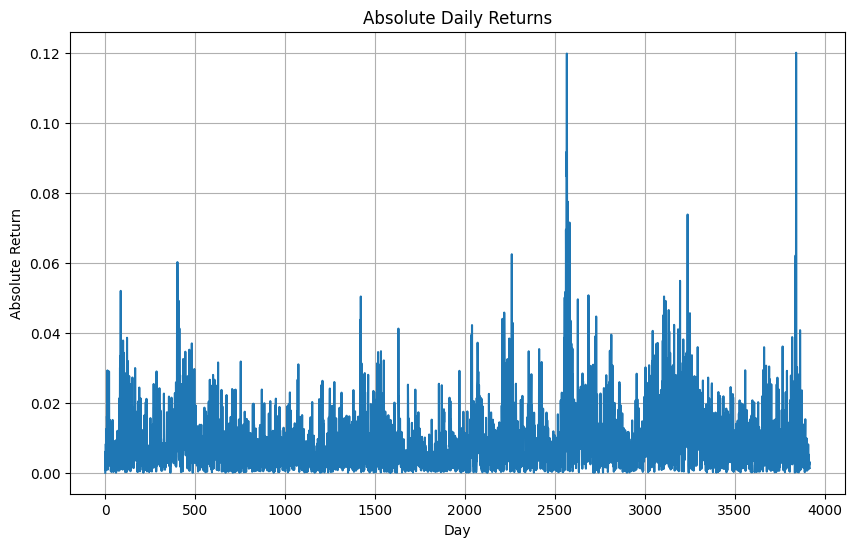

In [59]:
# Create the graph of abs(return) with the corrected syntax
# Use the plot method directly on the pandas Series for convenience
df_return['abs_return'].plot(figsize=(10, 6))

plt.title('Absolute Daily Returns')
plt.xlabel('Day')
plt.ylabel('Absolute Return')
plt.grid(True)

In [60]:
# 1. Define the event: abs(return) > 0.01
high_returns = df_return['abs_return'] > 0.01

# 2. Get the prior day's high return values using .shift()
prior_high_returns = high_returns.shift(1)

# 3. Calculate the number of days where both today's and yesterday's returns were high
# This is the count for P(A and B)
both_high = high_returns & prior_high_returns
count_both_high = both_high.sum()

# 4. Calculate the number of days where the prior day's return was high
# This is the count for P(B)
count_prior_high = prior_high_returns.sum()

# 5. Calculate the conditional probability P(A|B) = P(A and B) / P(B)
if count_prior_high > 0:
    conditional_probability = count_both_high / count_prior_high
else:
    conditional_probability = 0

print(f"Total number of days with abs(return) > 0.01: {high_returns.sum()}")
print(f"Total number of days where abs(return) > 0.01 on the prior day: {count_prior_high}")
print(f"Total number of days where abs(return) > 0.01 on both the current and prior day: {count_both_high}")
print(f"\nThe conditional probability is: {conditional_probability:.2f}")

Total number of days with abs(return) > 0.01: 1281
Total number of days where abs(return) > 0.01 on the prior day: 1281
Total number of days where abs(return) > 0.01 on both the current and prior day: 519

The conditional probability is: 0.41


In [61]:
# Calculate Autocorrelation for a specific lag (e.g., lag 1)
# A positive value suggests that a large squared return is followed by another large squared return, which is an indication of volatility clustering.
autocorr_lag1 = df_return['squared_return'].autocorr(lag=1)

# --- Logic to calculate the confidence interval ---
# N is the number of data points
N = len(df_return)

# The 95% confidence interval is approximately +/- 2/sqrt(N)
conf_interval = 2 / np.sqrt(N)

print("--- Autocorrelation of Squared Returns ---")
print(f"Autocorrelation at lag 1: {autocorr_lag1:.4f}")
print(f"95% Confidence Interval: +/- {conf_interval:.4f}")

# Check for statistical significance
if np.abs(autocorr_lag1) > conf_interval:
    print("\nInterpretation: The autocorrelation is statistically significant, indicating volatility clustering is present.")
else:
    print("\nInterpretation: The autocorrelation is not statistically significant, suggesting no strong evidence of volatility clustering.")

--- Autocorrelation of Squared Returns ---
Autocorrelation at lag 1: 0.3515
95% Confidence Interval: +/- 0.0320

Interpretation: The autocorrelation is statistically significant, indicating volatility clustering is present.


In [62]:
# Rescale the data to a better range (e.g., multiply by 100)
rescale_factor = 100
scaled_returns = df_return['return'] * rescale_factor

# Fit a GARCH(1,1) model to the scaled returns
# This will prevent the DataScaleWarning
am = arch_model(scaled_returns, vol='Garch', p=1, q=1)
res = am.fit(disp='off')

# Forecast the next day's conditional variance
forecasts = res.forecast(horizon=1)
next_day_variance = forecasts.variance.iloc[-1]

# The forecast is on the scaled data, so we must unscale it
estimated_abs_return = np.sqrt(next_day_variance.iloc[0]) / rescale_factor

print(f"\nEstimated conditional variance for the next day: {next_day_variance.iloc[0]:.6f}")
print(f"Estimated abs_return for the next day: {estimated_abs_return:.4f}")


Estimated conditional variance for the next day: 0.375585
Estimated abs_return for the next day: 0.0061


In [63]:
# Rescale the data to prevent the DataScaleWarning
rescale_factor = 100
scaled_returns = df_return['return'] * rescale_factor

# Set up the rolling forecast
# We'll use the last 50 days to test our predictions
out_of_sample_period = 50
predictions = []
actuals = scaled_returns[-out_of_sample_period:].abs().values

# Perform the rolling forecast
# The loop re-fits the model each day and makes a one-day-ahead prediction
for i in range(out_of_sample_period):
    train_data = scaled_returns[:-(out_of_sample_period - i)]
    am = arch_model(train_data, vol='Garch', p=1, q=1)
    res = am.fit(disp='off')

    # Get the one-day-ahead variance forecast and unscale it
    forecast = res.forecast(horizon=1)
    predicted_variance = forecast.variance.iloc[-1].iloc[0]
    predicted_abs_return = np.sqrt(predicted_variance)

    predictions.append(predicted_abs_return / rescale_factor)

# Create a DataFrame to compare predictions and actuals
df_results = pd.DataFrame({
    'Actual_abs_Return': np.abs(df_return['return'][-out_of_sample_period:]),
    'Predicted_abs_Return': predictions
})

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_results['Actual_abs_Return'] - df_results['Predicted_abs_Return']))

print("\n--- GARCH Rolling Forecast Results ---")
print(f"Mean Absolute Error (MAE) for the last {out_of_sample_period} days: {mae:.6f}")
print("\nDataFrame with Actual vs. Predicted values:")
print(df_results.head())

# To display the last 10 rows
print(df_results.tail(10))


--- GARCH Rolling Forecast Results ---
Mean Absolute Error (MAE) for the last 50 days: 0.005036

DataFrame with Actual vs. Predicted values:
      Actual_abs_Return  Predicted_abs_Return
3867           0.000959              0.014975
3868           0.003333              0.013887
3869           0.013897              0.013001
3870           0.001871              0.013303
3871           0.009261              0.012376
      Actual_abs_Return  Predicted_abs_Return
3907           0.008093              0.006943
3908           0.000961              0.007180
3909           0.005185              0.006957
3910           0.005176              0.006882
3911           0.004561              0.007048
3912           0.002128              0.006914
3913           0.002407              0.006691
3914           0.003125              0.006503
3915           0.001549              0.006364
3916           0.001340              0.006281
